In [262]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import math
import datetime

In [269]:
df=pd.read_csv('./work-data/train-data-cleaned.csv')

In [152]:
df.shape

(810557, 11)

In [117]:
import seaborn as sns
from matplotlib import pyplot as plt

check seasonality

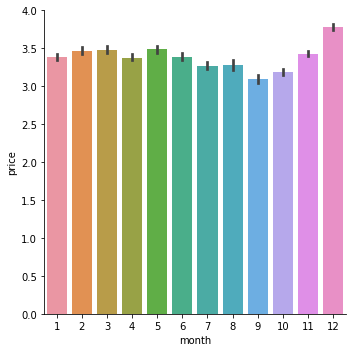

In [118]:
sns.catplot(data=df,x='month',y='price',kind='bar')

check for seasonality by country

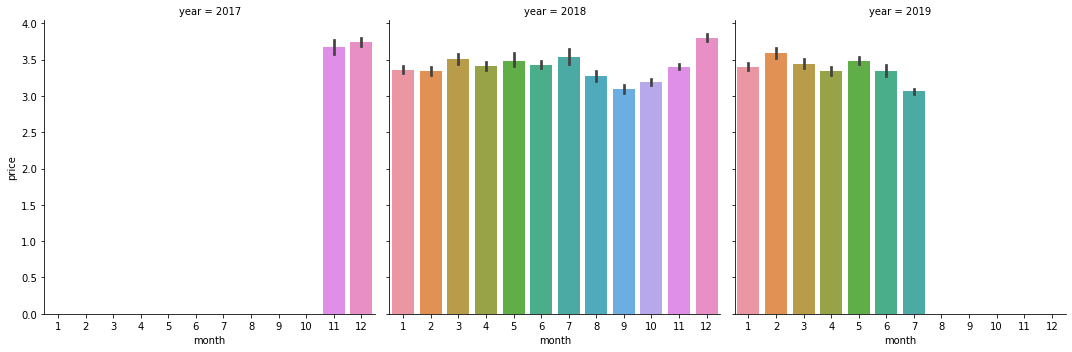

In [119]:
sns.catplot(data=df,x='month',y='price',kind='bar',col='year',col_wrap=3)

In [120]:
byMonth=df.groupby(['month','year']).sum()

In [121]:
byMonth=byMonth.reset_index()
byMonth=byMonth.sort_values(by=['year','month'],axis=0)
byMonth

,month,year,Unnamed: 0,customer_id,price,times_viewed,day
17,11,2017,36286718,87751980.0,27860.08,36706,220016
19,12,2017,500265555,301287137.0,104965.64,133104,264023
0,1,2018,501133737,310714403.0,93811.55,141752,476847
2,2,2018,361545352,305284760.0,81055.01,130741,373249
4,3,2018,618138248,394654478.0,110738.00,168161,504878
6,4,2018,463162817,355602298.0,95483.58,157814,455261
8,5,2018,620408605,415831947.0,112414.74,176582,486705
10,6,2018,642927175,416244746.0,112585.99,177125,485393
12,7,2018,503394038,375154622.0,103720.24,162969,467547
14,8,2018,481826305,357121198.0,94004.07,167474,464044


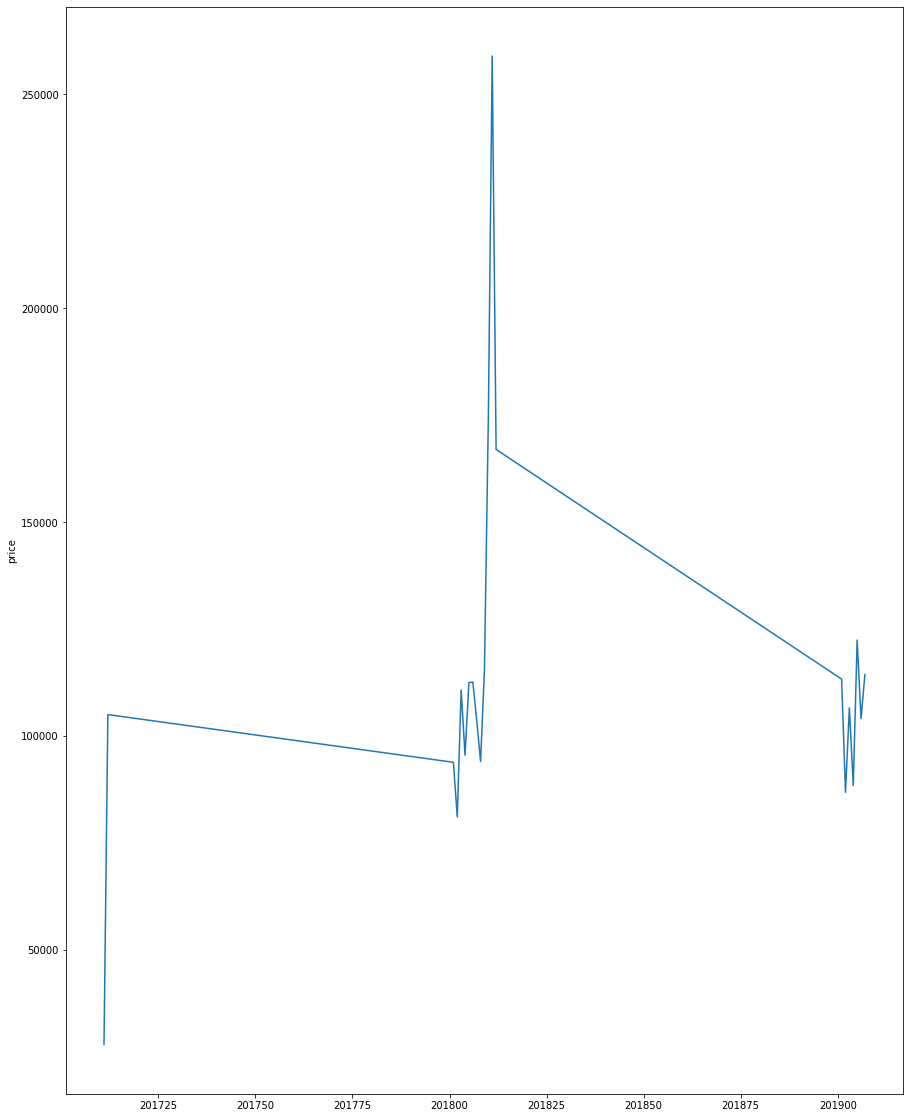

In [122]:
fig, ax = plt.subplots(figsize=(15,20))
sns.lineplot(x=byMonth['year']*100+byMonth['month'],y=byMonth['price'],ax=ax)

In [123]:
dfCount=df.groupby('country').count()
dfCount=dfCount.reset_index()
dfCount=dfCount.sort_values(by=['price'],ascending=False)
dfCount=dfCount[dfCount.price>1500]
major_countries=dfCount.country.astype(str).unique()

In [124]:
byCountry=df[df.country.isin(major_countries) ].groupby(['month','year','country']).sum()

In [125]:
byCountry=byCountry.reset_index()
byCountry['year_month']=byCountry['year']*100+byCountry['month']

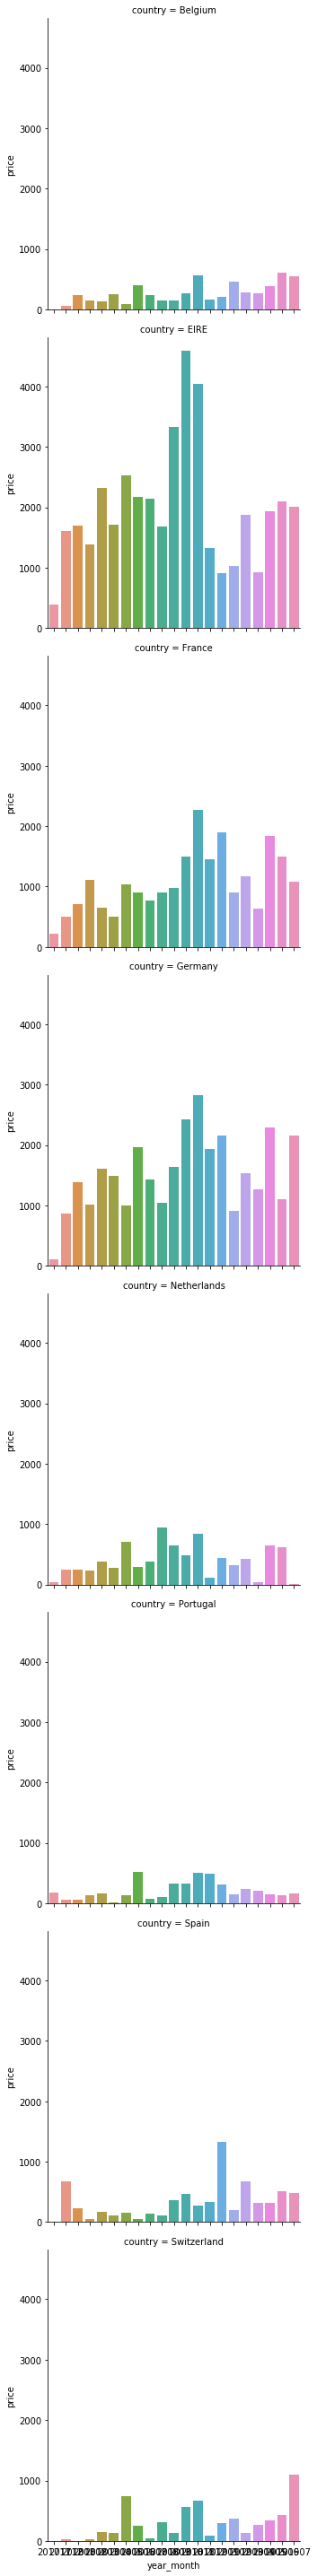

In [162]:
sns.catplot(data=byCountry[~byCountry.isin(['United Kingdom'])],x='year_month',y='price',col='country',col_wrap=1,kind='bar')

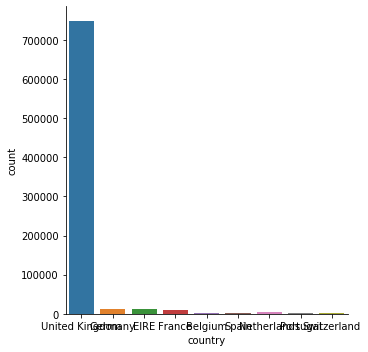

In [157]:
sns.catplot(data=dfmaj,x='country',kind='count')

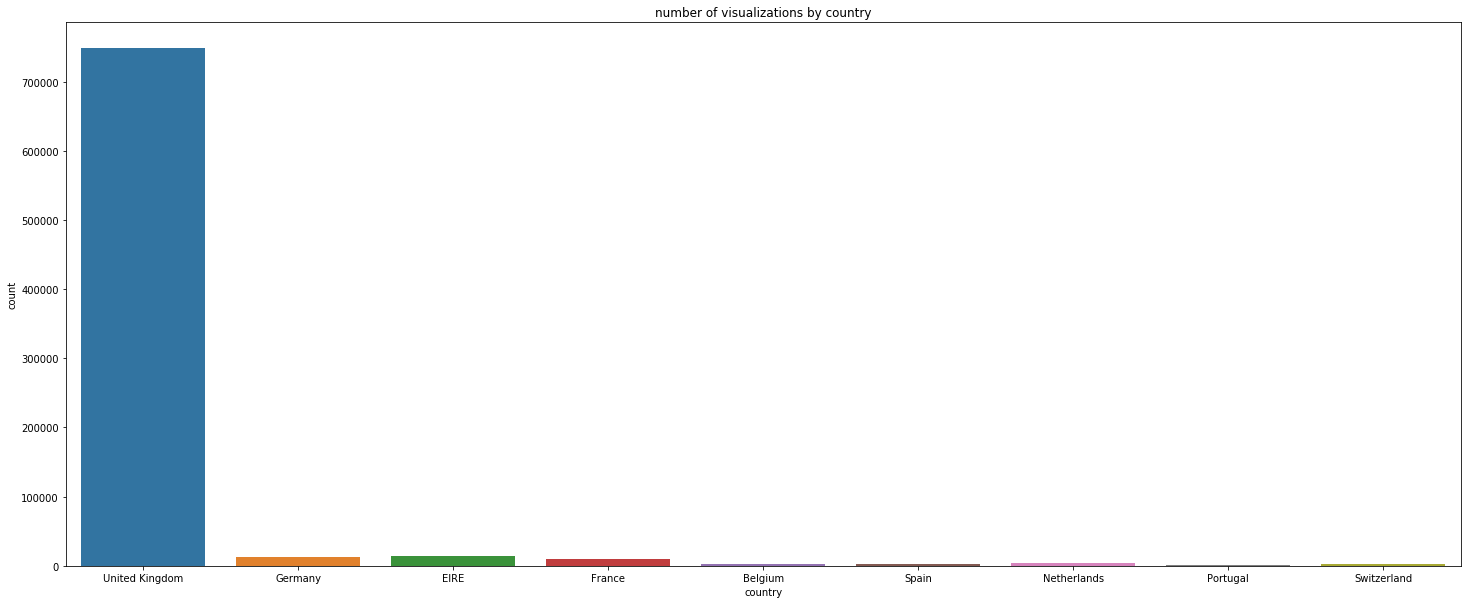

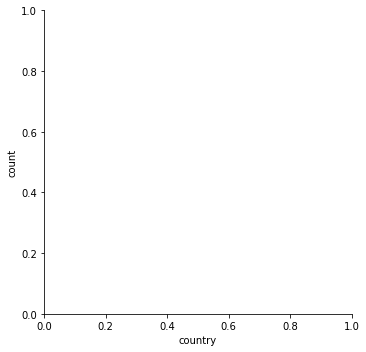

In [160]:
fig,ax=plt.subplots(1,1,figsize=[25,10])
ax.set_title('number of visualizations by country')
dfmaj=df[df.country.isin(major_countries)]
sns.catplot(data=dfmaj,x='country',kind='count',ax=ax)
plt.show()

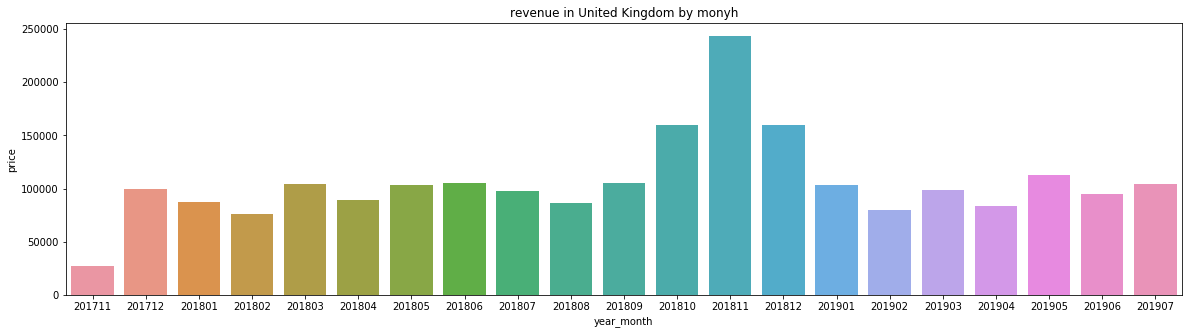

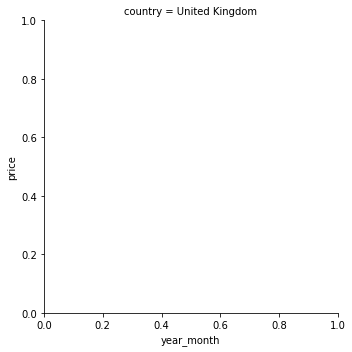

In [164]:
fig,ax=plt.subplots(1,1,figsize=[20,5])
ax.set_title('revenue in United Kingdom by monyh')
sns.catplot(data=byCountry[byCountry.country.isin(['United Kingdom'])],x='year_month',
            col='country',col_wrap=1,
            y='price',kind='bar',ax=ax)
plt.show()

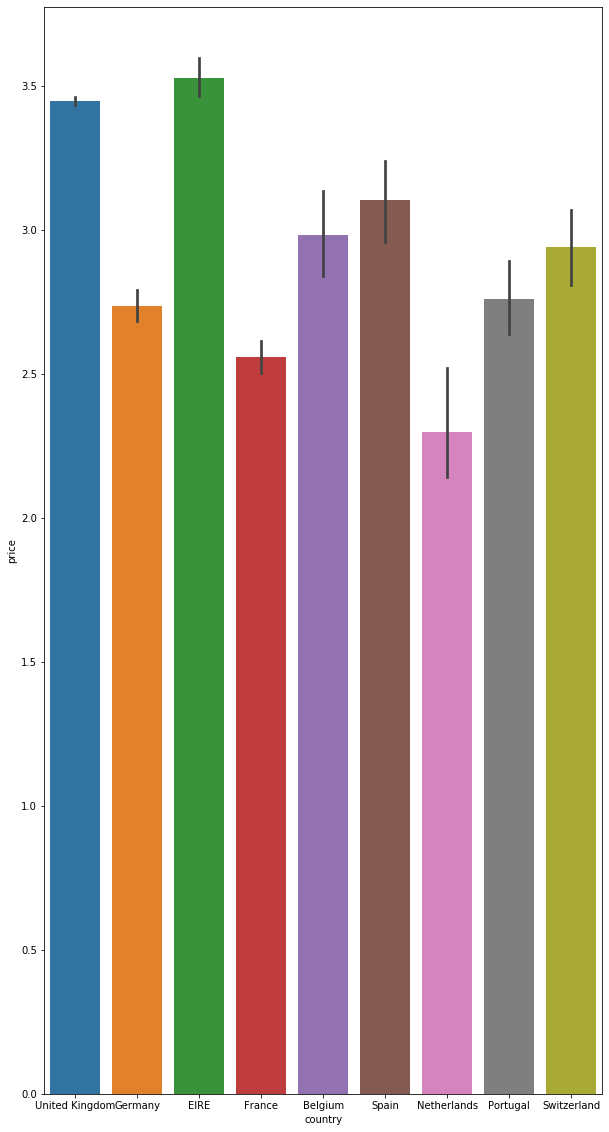

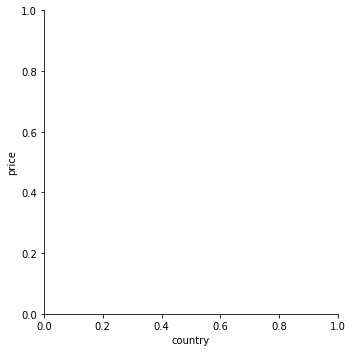

In [128]:
fig,ax=plt.subplots(figsize=[10,20])
ax.set_title='mean price per user'
sns.catplot(data=df[df.country.isin(major_countries)],x='country',y='price',kind='bar',ax=ax)

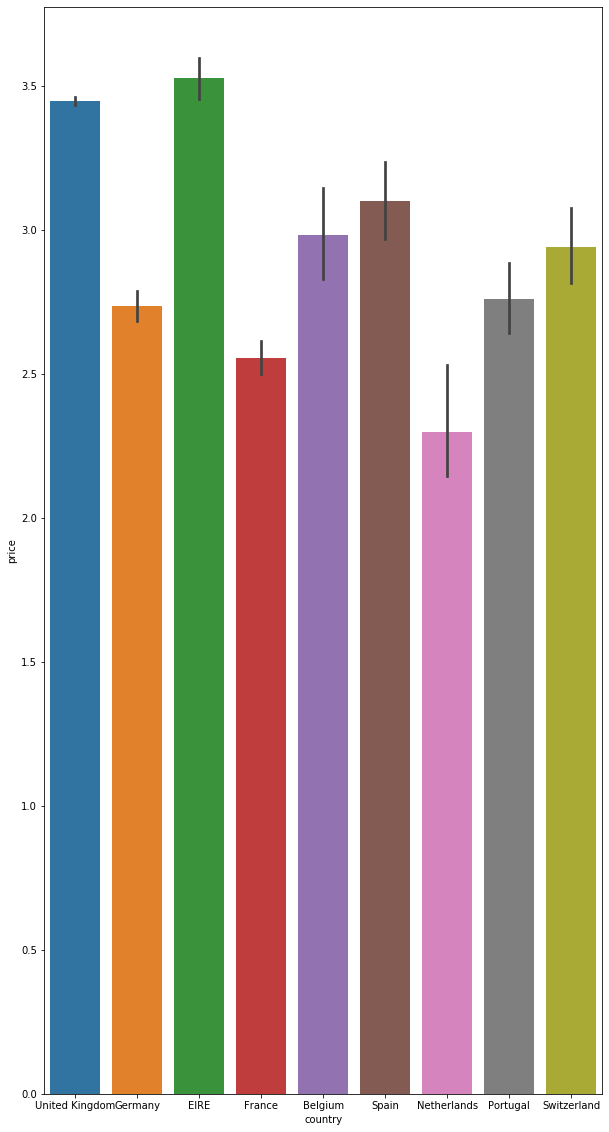

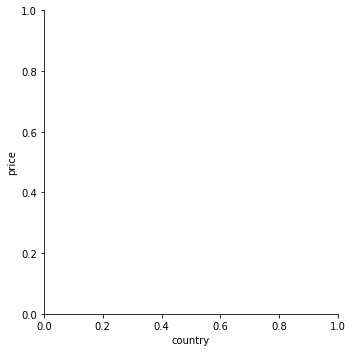

In [129]:
fig,ax=plt.subplots(figsize=[10,20])
ax.set_title='mean price per user'
sns.catplot(data=df[df.country.isin(major_countries)],x='country',y='price',kind='bar',ax=ax)

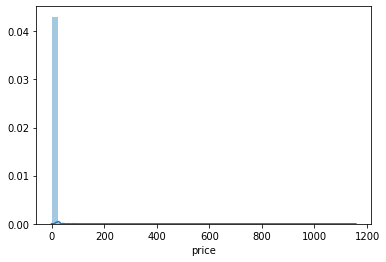

In [131]:
sns.distplot(df['price'])

In [133]:
df.sort_values(by=['price'],ascending=False).head(100)

,Unnamed: 0,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,date
489361,9035,United Kingdom,NaN,507637,1157.15,84016,1,2018,5,7,2018-05-07
727056,25093,United Kingdom,NaN,502451,867.79,84016,1,2018,3,21,2018-03-21
240080,9316,United Kingdom,15098.0,556446,649.50,22502,1,2019,6,7,2019-06-07
240078,9314,United Kingdom,15098.0,556444,649.50,22502,1,2019,6,7,2019-06-07
600919,32036,United Kingdom,NaN,506571,408.40,84016,1,2018,4,27,2018-04-27
...,...,...,...,...,...,...,...,...,...,...,...
694298,19753,United Kingdom,17139.0,544824,165.00,22827,1,2019,2,21,2019-02-21
631208,29142,United Kingdom,13523.0,554348,165.00,22827,1,2019,5,21,2019-05-21
262862,32098,United Kingdom,14711.0,558627,165.00,22827,1,2019,6,27,2019-06-27
163715,53186,Netherlands,14646.0,C534845,150.00,22656,3,2018,11,21,2018-11-21


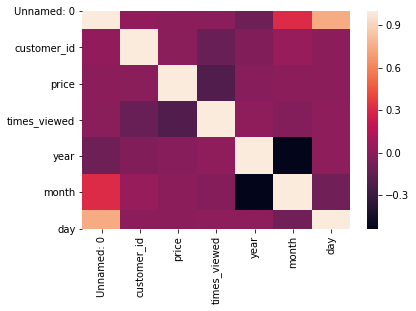

In [134]:
sns.heatmap(df.corr())

In [172]:
byMonth=df.groupby(['month','year']).sum()
byMonth=byMonth.reset_index()
byMonth=byMonth.sort_values(by=['year','month'],axis=0)
byMonth.rename(columns={'price':'revenue'},inplace=True)
byMonth=byMonth[['month','year','revenue']]
byMonth['year_month']=byMonth.year*100+byMonth.month
byMonth

,month,year,revenue,year_month
17,11,2017,35138.30,201711
19,12,2017,134871.22,201712
0,1,2018,121691.33,201801
2,2,2018,99814.63,201802
4,3,2018,134108.12,201803
6,4,2018,113826.26,201804
8,5,2018,134929.76,201805
10,6,2018,135627.17,201806
12,7,2018,121644.24,201807
14,8,2018,110285.08,201808


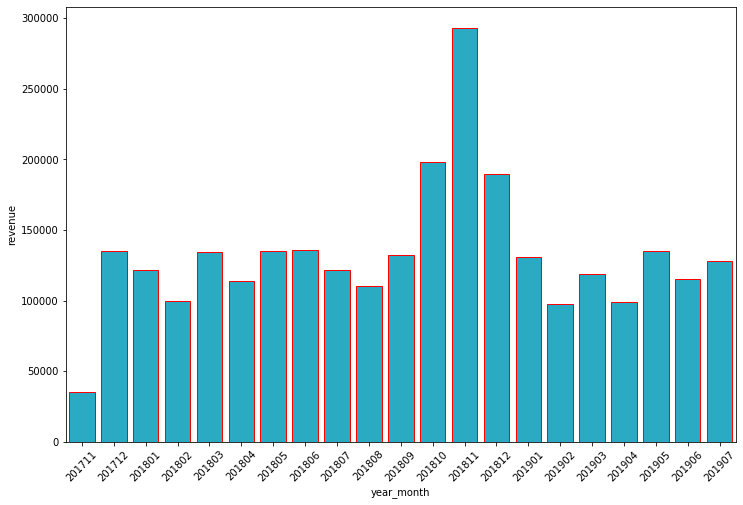

In [246]:
import matplotlib
fig = plt.gcf()
fig.set_size_inches(12, 8)
colors = ["#11BBDD"]
revenue_by_month=sns.barplot(x=byMonth.year_month,y=byMonth.revenue,palette=sns.color_palette(colors),edgecolor='#FF0000')
for item in revenue_by_month.get_xticklabels():
    item.set_rotation(45)

Text(0.5, 1.0, 'views by country')

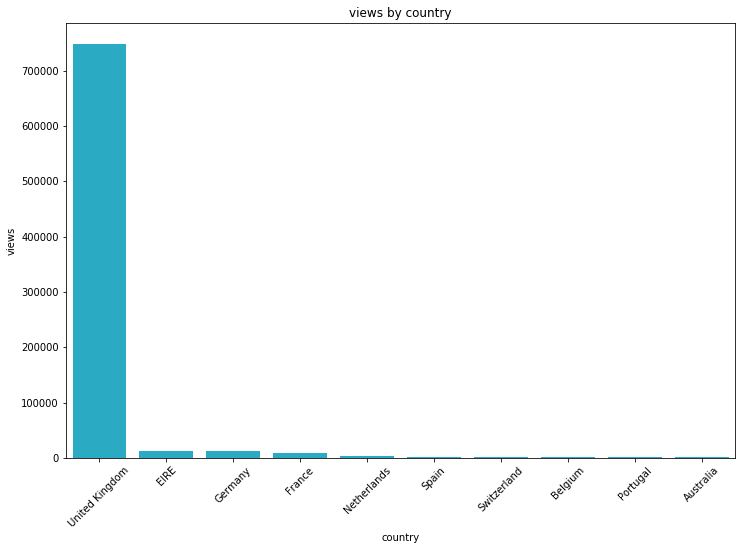

In [244]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
colors = ["#11BBDD"]
dfv=df[['country','price']]
dfv=dfv.groupby(['country']).count()
dfv=dfv.reset_index()
dfv.rename(columns={'price':'views'},inplace=True)
dfv=dfv.sort_values(by=['views'],ascending=False)
dfv=dfv[dfv.views>1500]
views_by_country=sns.barplot(data=dfv,x='country',y='views',palette=sns.color_palette(colors))
for item in views_by_country.get_xticklabels():
    item.set_rotation(45)
views_by_country.set_title('views by country')

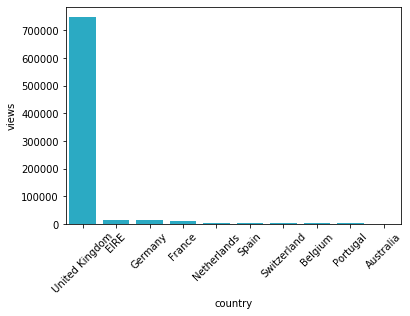

In [249]:
ddays=df.groupby(['year','month','day']).count()

In [251]:
ddays.shape

(495, 8)

In [295]:
import datetime as dt
# get the amount of last ndays revenue given a DataFrame with the data
# and a date
def getLastTirthyDaysRevenue(df,date,ndays):
    # calculate the interval of data to sum
    endDate=dt.datetime.strptime(date, '%Y-%m-%d')
    startDate=endDate - dt.timedelta(days=ndays)
    startS=startDate.strftime('%Y-%m-%d')
    revByDay=(df.groupby('date').sum())[['price']]
    last_month_amount=revByDay.loc[startS:date,:]['price'].sum()
    return last_month_amount
    
days=df['date'].unique()
odf=pd.DataFrame(columns=['revenue_day','revenue_30d','revenue_90d'])
for d in days:
    odf=odf.append({
        'revenue_day':getLastTirthyDaysRevenue(df,d,1),
        'revenue_30d':getLastTirthyDaysRevenue(df,d,30),
        'revenue_90d':getLastTirthyDaysRevenue(df,d,90),
    },ignore_index=True)
odf.head()

,revenue_day,revenue_30d,revenue_90d
0,1916.55,128142.57,171926.07
1,4977.82,129760.58,174987.34
2,4025.87,124343.24,175951.94
3,4311.70,116459.31,179299.04
4,5754.47,110118.19,181706.41


In [265]:
df

,Unnamed: 0,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,date
0,0,United Kingdom,15581.0,493463,2.95,20895,1,2018,1,1,2018-01-01
1,1,United Kingdom,15581.0,493463,1.25,20866,1,2018,1,1,2018-01-01
2,2,United Kingdom,15581.0,493463,0.85,85198,12,2018,1,1,2018-01-01
3,3,United Kingdom,15581.0,493463,2.95,20897,1,2018,1,1,2018-01-01
4,4,United Kingdom,15581.0,493463,2.95,20898,1,2018,1,1,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...
810552,35050,United Kingdom,13269.0,548708,4.95,23184,2,2019,3,31,2019-03-31
810553,35051,United Kingdom,13269.0,548708,1.25,47310,1,2019,3,31,2019-03-31
810554,35052,United Kingdom,13269.0,548708,0.42,79190,9,2019,3,31,2019-03-31
810555,35053,United Kingdom,13269.0,548708,1.65,22859,1,2019,3,31,2019-03-31


In [270]:
dd=df.iloc[0].date
dd

'2018-01-01'

In [274]:
dd2=dt.datetime.strptime(dd, '%Y-%m-%d')

In [275]:
type(dd2)

datetime.datetime

In [273]:
df

,Unnamed: 0,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,date
0,0,United Kingdom,15581.0,493463,2.95,20895,1,2018,1,1,2018-01-01
1,1,United Kingdom,15581.0,493463,1.25,20866,1,2018,1,1,2018-01-01
2,2,United Kingdom,15581.0,493463,0.85,85198,12,2018,1,1,2018-01-01
3,3,United Kingdom,15581.0,493463,2.95,20897,1,2018,1,1,2018-01-01
4,4,United Kingdom,15581.0,493463,2.95,20898,1,2018,1,1,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...
810552,35050,United Kingdom,13269.0,548708,4.95,23184,2,2019,3,31,2019-03-31
810553,35051,United Kingdom,13269.0,548708,1.25,47310,1,2019,3,31,2019-03-31
810554,35052,United Kingdom,13269.0,548708,0.42,79190,9,2019,3,31,2019-03-31
810555,35053,United Kingdom,13269.0,548708,1.65,22859,1,2019,3,31,2019-03-31


In [277]:
dd2.strftime('%Y-%m-%d')

'2018-01-01'

In [278]:
revByDay=(df.groupby('date').sum())[['price']]

In [296]:
revByDay.loc['2017-11-28':'2017-11-28',:]['price'].sum()

12675.240000000293

In [307]:
revenueByCountry = (df.groupby('country').sum())[['price']]
revenueByCountry.rename(columns={'price': 'revenue'}, inplace=True)
revenueByCountry = revenueByCountry.sort_values(
    by=['revenue'], ascending=False)
revenueByCountry = revenueByCountry.head(10)

countries = revenueByCountry.index.unique().values
print(countries)

['United Kingdom' 'EIRE' 'Germany' 'France' 'Netherlands' 'Spain'
 'Switzerland' 'Belgium' 'Channel Islands' 'Portugal']


In [309]:
dates=df.date.unique()

In [310]:
df.date.min()

'2017-11-28'

In [311]:
df.date.max()

'2019-07-31'

In [312]:
d1=dt.datetime(2017,11,28)
d2=dt.datetime(2019,7,31)

In [314]:
(d2-d1).days

610